In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets,transforms

import seaborn as sns

%matplotlib inline

In [2]:
data_path = os.path.join(os.getcwd(), "data", "bank_marketing")

In [3]:
train_df = pd.read_csv(data_path + "/bank_marketing_train.csv")

In [4]:
train_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
train_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,40.000941,258.854299,2.558314,962.537131,0.172620,0.084820,93.575129,-40.491921,3.624562,5167.147431
std,10.410233,259.167585,2.732370,186.757655,0.493482,1.570037,0.578020,4.629348,1.734087,72.197238
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4199.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
train_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [15]:
num_cols = []
for i in train_df:
    if train_df[i].dtypes == 'int64' or train_df[i].dtypes == 'float64':
        num_cols.append(i)

In [16]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [18]:
df = train_df.loc[:, num_cols]

In [21]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,40.000941,258.854299,2.558314,962.537131,0.172620,0.084820,93.575129,-40.491921,3.624562,5167.147431
std,10.410233,259.167585,2.732370,186.757655,0.493482,1.570037,0.578020,4.629348,1.734087,72.197238
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4199.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
y = train_df.loc[:, 'y']

In [33]:
y = (y=='yes').astype(int)

In [34]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32946    1
32947    0
32948    0
32949    1
32950    0
Name: y, Length: 32951, dtype: int64

In [36]:
type(y)

pandas.core.series.Series

In [37]:
type(df)

pandas.core.frame.DataFrame

In [38]:
all_df = pd.concat([df, y])

In [39]:
all_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,NaN
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,NaN
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,NaN
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,NaN
4,45.0,198.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
32947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
32948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
32949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [40]:
all_df_2 = df.join(y)

In [41]:
all_df_2

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...
32946,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
32947,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
32948,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
32949,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


<Axes: >

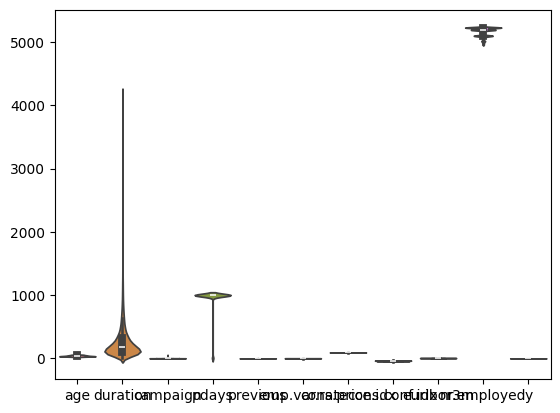

In [42]:
sns.violinplot(all_df_2)

In [49]:
all_df_2 = all_df_2.drop(['duration'], axis=1)

<Axes: >

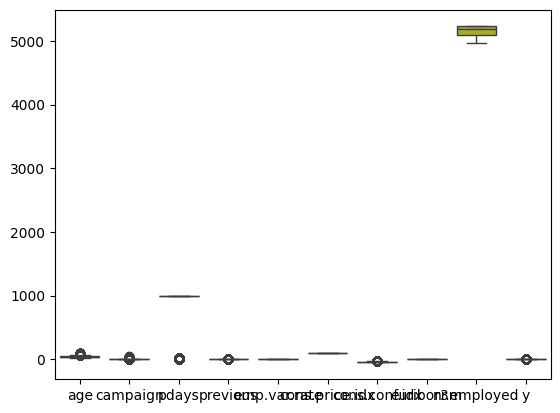

In [50]:
sns.boxplot(all_df_2)